# Imports

In [101]:
import numpy as np
import copy
from sklearn.linear_model import LogisticRegression
import os
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt

import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,precision_recall_curve,accuracy_score,roc_auc_score
import seaborn as seab
import matplotlib.pyplot as plt


import numpy as np
import copy

import os
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt
import seaborn as seab
import warnings

# import tensorflow as tf
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from imblearn.over_sampling import SMOTE


# from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_recall_curve,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from PIL import Image
import numpy as np
import copy
# import cv2
import os
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
import pandas as pd
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt
import seaborn as seab
from numpy import histogram
import warnings
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.metrics import classification_report,confusion_matrix
# from xgboost import XGBClassifier
import scipy
from scipy.misc import imread
# from skimage.color import rgb2lab
# from skimage.color import rgb2gray
# from skimage.measure import regionprops
import pickle
import random
import seaborn as sb
# from skimage.feature import hog,local_binary_pattern
from sklearn.model_selection import train_test_split
# from skimage import data, exposure
# train_test_split_ratio = 0.7

warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import metrics
np.set_printoptions(suppress=True) 

In [328]:
knn = KNeighborsClassifier(weights='uniform',n_neighbors=48,p=2,leaf_size=30,metric='minkowski',n_jobs=1,algorithm='auto',metric_params=None)
randomforest =RandomForestClassifier(n_estimators=150,random_state=42)
logistic = LogisticRegression()
gnb = GaussianNB()

In [378]:
def getvariance(nonedata):
    pca=PCA(n_components=len(nonedata[0]))
    pca.fit(nonedata)
    return pca.explained_variance_ratio_.sum()
import matplotlib.patches as pat
def scatterplot(data,labels):
    plt.figure()
    pca = PCA(n_components=2)
    scatter_X = pca.fit_transform(data)
    classes = ['Fraud','Not-Fraud']
    colours = ['orange','grey']
    recs = []
    plt.xlim([-5, 30])
    plt.ylim([-5, 30])
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    #plt.title("Scatter plot: Undersampling with PCA")
    for i in range(0,len(colours)):
        recs.append(pat.Rectangle((0,0),1,1,fc=colours[i]))

    for i in range(0,len(scatter_X)):
        if((labels[i] == 1)):
            plt.scatter(scatter_X[i][0],scatter_X[i][1],c=colours[0])
        else:
            plt.scatter(scatter_X[i][0],scatter_X[i][1],c=colours[1])
    plt.legend(recs,classes,loc='best')
    plt.show()

In [322]:
def heatmap(confusionmat,title="Confusion Matrix",title2="",index=0):
    plt.figure()
    ax = plt.axes()
    seab.heatmap(confusionmat,linewidths=0.4,linecolor='white',annot=True,fmt='g') 
    ax.set_title(title + title2)
def getConfusionMat(predicted, actual,classcount):
    confusionmatrix = []
    for i in range (classcount):
        confusionmatrix.append([])
        for j in range (classcount):
            confusionmatrix[i].append(0)
    for i in range(0, len(predicted)):
        confusionmatrix[actual[i]][predicted[i]]+=1
    return confusionmatrix
def p_r_c(true_labels,scores):
    plt.figure()
    precision, recall, _ = precision_recall_curve(true_labels, scores)
    plt.plot(recall, precision)
    #plt.fill_between(recall, precision, step='post', alpha=0.2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
    plt.title('Precision Recall Curve')
    plt.show()
    
def r_o_c(true_labels,scores):
    plt.figure()
    fpr, tpr, thresholds = roc_curve(true_labels, scores)
    plt.plot(fpr, tpr)
    #plt.fill_between(recall, precision, step='post', alpha=0.2,     color='#F59B00')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.show()
def reports(classifier,train_data,train_labels,train_test_split_ratio=.2,folding=False):
    scores = []
    print classifier
    X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels,shuffle=False, test_size=train_test_split_ratio)
    if(folding == True):
        kf = KFold(n_splits=5,shuffle=False)
        kf.get_n_splits(X_train)
        print(kf)
        scores = []
        for train_index, test_index in kf.split(X_train):
            #print("TRAIN:", len(train_index), "TEST:", len(test_index))
            X_traini, X_testi = X_train[train_index], X_train[test_index]
            y_traini, y_testi = y_train[train_index], y_train[test_index]
            classifier.fit(X_traini,y_traini)
            predicted = classifier.predict(X_testi)
            scores.append(accuracy_score(predicted,y_testi))
        scores = np.array(scores)
        print ("Per fold Score 5 fold",scores)
        print ("Average Accuracy K Fold: ",scores.mean())
    
    classifier.fit(X_train,y_train)
    predicted = classifier.predict(X_test)
    prob_scores = classifier.predict_proba(X_test)
    r_o_c(y_test,prob_scores[:,1])
    p_r_c(y_test,prob_scores[:,1])
    print ("Test Data Results:")
    print ("Test Accuracy: ",accuracy_score(predicted,y_test))
    print "MCC: ",mcc(y_test, predicted)
    X = classification_report(y_test,predicted)
    print (X)
    print "ROC AUC",roc_auc_score(y_true=y_test,y_score=prob_scores[:,1])
    heatmap(confusionmat=getConfusionMat(actual=y_test,predicted=predicted,classcount=2))
    
    
def reports_test(classifier,X_train,y_train,X_test,y_test):
    scores = []
    print classifier
#     X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels,shuffle=False, test_size=train_test_split_ratio)
    classifier.fit(X_train,y_train)
    predicted = classifier.predict(X_test)
    prob_scores = classifier.predict_proba(X_test)
    r_o_c(y_test,prob_scores[:,1])
    p_r_c(y_test,prob_scores[:,1])
    print ("Test Data Results:")
    print ("Test Accuracy: ",accuracy_score(predicted,y_test))
    print "MCC: ",mcc(y_test, predicted)
    X = classification_report(y_test,predicted)
    print (X)
    print "ROC AUC",roc_auc_score(y_true=y_test,y_score=prob_scores[:,1])
    heatmap(confusionmat=getConfusionMat(actual=y_test,predicted=predicted,classcount=2))

In [4]:
all_data = pd.read_csv("../Dataset/PS_20174392719_1491204439457_log.csv")

In [5]:
print len(all_data)

6362620


In [6]:
print all_data.keys()
all_data.shape

Index([u'step', u'type', u'amount', u'nameOrig', u'oldbalanceOrg',
       u'newbalanceOrig', u'nameDest', u'oldbalanceDest', u'newbalanceDest',
       u'isFraud', u'isFlaggedFraud'],
      dtype='object')


(6362620, 11)

In [7]:
print all_data.iloc[0,:]
all_data.head()

step                        1
type                  PAYMENT
amount                9839.64
nameOrig          C1231006815
oldbalanceOrg          170136
newbalanceOrig         160296
nameDest          M1979787155
oldbalanceDest              0
newbalanceDest              0
isFraud                     0
isFlaggedFraud              0
Name: 0, dtype: object


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# remove feature isFlagged fraud

In [8]:
new_all_data = pd.DataFrame()
new_all_data = new_all_data.append(all_data.loc[:,['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud']])

In [9]:
print " Total samples in original data: ",len(new_all_data)

 Total samples in original data:  6362620


In [10]:
set(new_all_data.type)

{'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'}

# Working on only two type- Cashout and Transfer

In [11]:
 new_filterdata = pd.DataFrame()

In [12]:
new_filterdata = pd.DataFrame()
new_filterdata= new_filterdata.append(new_all_data.loc[new_all_data.loc[:,'type'] == 'TRANSFER',:],ignore_index=True)
len(new_filterdata)
new_filterdata= new_filterdata.append(new_all_data.loc[new_all_data.loc[:,'type'] == 'CASH_OUT',:],ignore_index=True)
len(new_filterdata)
print new_filterdata.keys()

Index([u'step', u'type', u'amount', u'nameOrig', u'oldbalanceOrg',
       u'newbalanceOrig', u'nameDest', u'oldbalanceDest', u'newbalanceDest',
       u'isFraud'],
      dtype='object')


In [13]:
print set(new_filterdata.type)

set(['CASH_OUT', 'TRANSFER'])


In [14]:
new_filterdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
2,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
3,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
4,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0


In [15]:
copydata = copy.deepcopy(new_filterdata)

In [16]:
copydata.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
2,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
3,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
4,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0


# Class Unbalanced

In [17]:
print "Total samples in two types: ",len(copydata)
print "Total samples of fraud: ",len(copydata.loc[copydata['isFraud']== 1]) 
print "Total samples of not fraud: ",len(copydata.loc[copydata['isFraud']== 0]) 

Total samples in two types:  2770409
Total samples of fraud:  8213
Total samples of not fraud:  2762196


# One hot encoding of Type- Cashout and Transfer

In [18]:
copydata['CASH_OUT']=0
copydata['TRANSFER']=0
copydata.loc[copydata['type'] == 'TRANSFER', "TRANSFER"] = 1
copydata.loc[copydata['type'] == 'CASH_OUT', "CASH_OUT"] = 1

In [19]:
copydata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1
1,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,1
2,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,1
3,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,1
4,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,1


In [20]:
copydata.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER
2770404,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,1,0
2770405,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,1,0
2770406,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,1,0
2770407,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,1,0
2770408,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,1,0


In [21]:
print len(copydata.loc[copydata['type']== 'CASH_OUT'])
print len(copydata.loc[copydata['CASH_OUT']== 1   ])
print len(copydata.loc[copydata['type']== 'TRANSFER'] )
print len(copydata.loc[copydata['TRANSFER']== 1  ] )


2237500
2237500
532909
532909


In [22]:
copydata_new = pd.DataFrame()
copydata_new = copydata.drop('type',axis=1)


In [23]:
copydata_new.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER
0,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1
1,1,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,1
2,1,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,1
3,1,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,1
4,1,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,1


In [24]:
# copydata = copy.deepcopy(copy2)
unique_nameOrig = set(copydata_new.nameOrig)
unique_nameDest = set(copydata_new.nameDest)

In [25]:
print len(unique_nameOrig)
print len(unique_nameDest)

2768630
509565


# Predicting all in one class

In [26]:
y_train = copydata_new['isFraud']
y_fraud = np.ones(len(copydata_new))
x = np.zeros(len(copydata_new))
new = np.concatenate((y_fraud.T,x)).T
y_nonfraud = np.zeros(len(copydata_new))


In [27]:
print "Predicting all as fraud:  Accuracy = ",accuracy_score(y_train,y_fraud), " AUC = ",roc_auc_score(y_train, y_fraud)
#print "Predicting all as not fraud:  Accuracy = ",accuracy_score(y_train,y_nonfraud), " AUC = ",roc_auc_score(y_train, y_nonfraud)

Predicting all as fraud:  Accuracy =  0.002964544224336551  AUC =  0.5


# Remooving nameOrig and DestOrig

In [28]:
filter_data = pd.DataFrame()
filter_data= copydata_new.drop('isFraud',axis=1)
filter_data= filter_data.drop('nameOrig',axis=1)
filter_data= filter_data.drop('nameDest',axis=1)

In [29]:
filter_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,TRANSFER
0,1,181.00,181.00,0.0,0.00,0.00,0,1
1,1,215310.30,705.00,0.0,22425.00,0.00,0,1
2,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,1
3,1,62610.80,79114.00,16503.2,517.00,8383.29,0,1
4,1,42712.39,10363.39,0.0,57901.66,24044.18,0,1


# SMOTE

In [30]:
sm = SMOTE(ratio='minority', random_state=42)
X_res, y_res = sm.fit_sample(filter_data, y_train)

In [184]:
filter_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,TRANSFER
0,1,181.00,181.00,0.0,0.00,0.00,0,1
1,1,215310.30,705.00,0.0,22425.00,0.00,0,1
2,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,1
3,1,62610.80,79114.00,16503.2,517.00,8383.29,0,1
4,1,42712.39,10363.39,0.0,57901.66,24044.18,0,1


In [85]:
# print X_res.shape

In [86]:
# print np.count_nonzero(y_res)

In [35]:
X_res,y_res = shuffle(X_res,y_res)

KFold(n_splits=5, random_state=None, shuffle=False)
('Per fold Score 5 fold', array([0.71912076, 0.72229079, 0.71998624, 0.72034117, 0.72006399]))
('Average Accuracy K Fold: ', 0.7203605916950522)


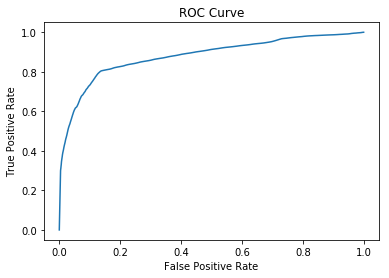

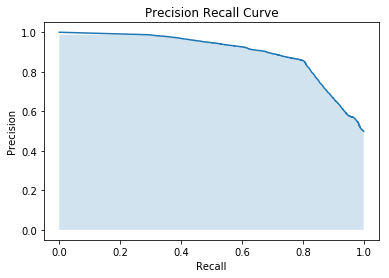

Test Data Results:
('Test Accuracy: ', 0.7214717629713299)
              precision    recall  f1-score   support

           0       0.65      0.98      0.78    553159
           1       0.95      0.46      0.62    551720

   micro avg       0.72      0.72      0.72   1104879
   macro avg       0.80      0.72      0.70   1104879
weighted avg       0.80      0.72      0.70   1104879

ROC AUC 0.8793235412933592


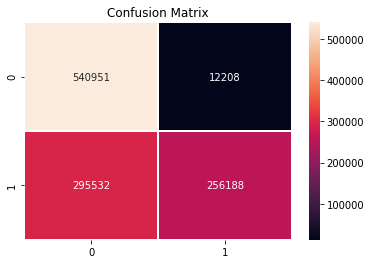

In [78]:
reports(GaussianNB(),X_res,y_res,train_test_split_ratio=0.2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=48, p=2,
           weights='uniform')
KFold(n_splits=5, random_state=None, shuffle=False)
('Per fold Score 5 fold', array([0.98770227, 0.98759932, 0.98768869, 0.98752124, 0.98765813]))
('Average Accuracy K Fold: ', 0.9876339315918997)


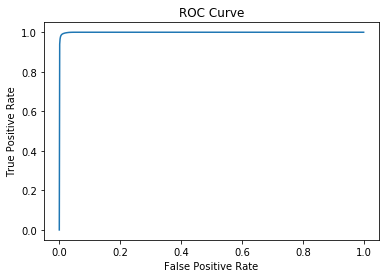

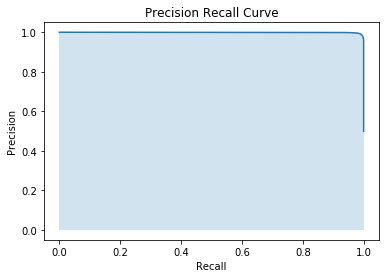

Test Data Results:
('Test Accuracy: ', 0.9883697671871762)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553159
           1       0.98      1.00      0.99    551720

   micro avg       0.99      0.99      0.99   1104879
   macro avg       0.99      0.99      0.99   1104879
weighted avg       0.99      0.99      0.99   1104879

ROC AUC 0.9990216952511654


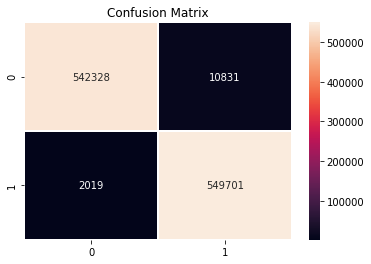

In [108]:
reports(knn,X_res,y_res,train_test_split_ratio=0.2)

# SMOTE END

# 5 Feature with SMOTE

In [90]:
filter_data_5f = filter_data.drop(['step','newbalanceOrig','newbalanceDest'],axis=1)

In [99]:
filter_data_5f.head()

,amount,oldbalanceOrg,oldbalanceDest,CASH_OUT,TRANSFER
0,181.00,181.00,0.00,0,1
1,215310.30,705.00,22425.00,0,1
2,311685.89,10835.00,6267.00,0,1
3,62610.80,79114.00,517.00,0,1
4,42712.39,10363.39,57901.66,0,1


In [91]:
sm = SMOTE(ratio='minority', random_state=42)
X_res_5f, y_res_5f = sm.fit_sample(filter_data_5f, y_train)

In [92]:
X_res_5f,y_res_5f = shuffle(X_res_5f,y_res_5f)

KFold(n_splits=5, random_state=None, shuffle=False)
('Per fold Score 5 fold', array([0.73966148, 0.74051564, 0.73990811, 0.74177115, 0.73978111]))
('Average Accuracy K Fold: ', 0.7403274978254976)


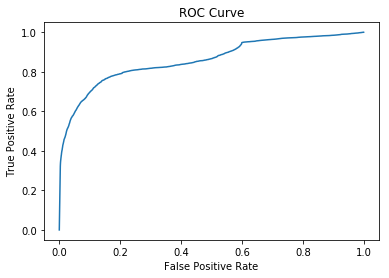

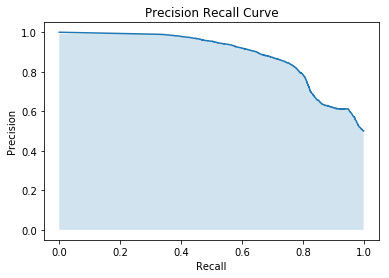

Test Data Results:
('Test Accuracy: ', 0.7400547933303103)
              precision    recall  f1-score   support

           0       0.66      0.97      0.79    551700
           1       0.95      0.51      0.66    553179

   micro avg       0.74      0.74      0.74   1104879
   macro avg       0.81      0.74      0.73   1104879
weighted avg       0.81      0.74      0.72   1104879

ROC AUC 0.8600040435339712


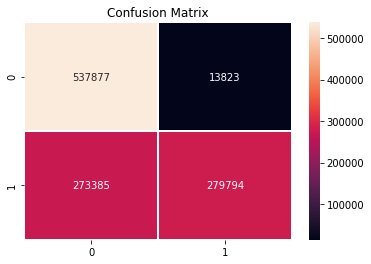

In [93]:
reports(GaussianNB(),X_res_5f,y_res_5f,train_test_split_ratio=0.2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=48, p=2,
           weights='uniform')
KFold(n_splits=5, random_state=None, shuffle=False)
('Per fold Score 5 fold', array([0.98695106, 0.98703591, 0.98730291, 0.98705173, 0.98704721]))
('Average Accuracy K Fold: ', 0.9870777617224828)


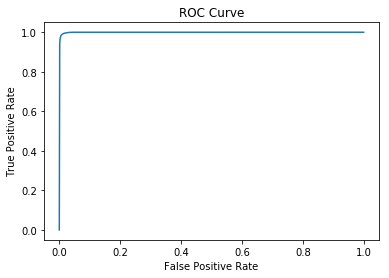

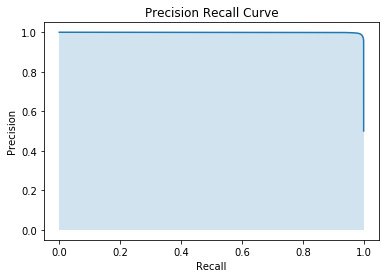

Test Data Results:
('Test Accuracy: ', 0.987998685828946)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    551700
           1       0.98      1.00      0.99    553179

   micro avg       0.99      0.99      0.99   1104879
   macro avg       0.99      0.99      0.99   1104879
weighted avg       0.99      0.99      0.99   1104879

ROC AUC 0.9989834628243173


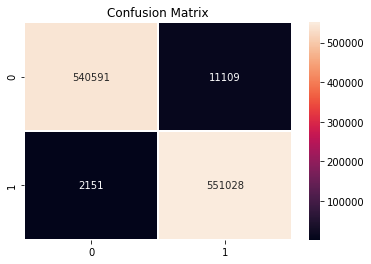

In [106]:
reports(knn,X_res_5f,y_res_5f,train_test_split_ratio=0.2)

# 5 Feature with SMOTE END

# 3 Feature with SMOTE

In [94]:
filter_data_3f = filter_data.drop(['step','newbalanceOrig','newbalanceDest','CASH_OUT','TRANSFER'],axis=1)

In [98]:
filter_data_3f.head()

,amount,oldbalanceOrg,oldbalanceDest
0,181.00,181.00,0.00
1,215310.30,705.00,22425.00
2,311685.89,10835.00,6267.00
3,62610.80,79114.00,517.00
4,42712.39,10363.39,57901.66


In [95]:
sm = SMOTE(ratio='minority', random_state=42)
X_res_3f, y_res_3f = sm.fit_sample(filter_data_3f, y_train)

In [96]:
X_res_3f,y_res_3f = shuffle(X_res_3f,y_res_3f)

KFold(n_splits=5, random_state=None, shuffle=False)
('Per fold Score 5 fold', array([0.74055637, 0.74053262, 0.74197961, 0.7424839 , 0.7416648 ]))
('Average Accuracy K Fold: ', 0.7414434579696405)


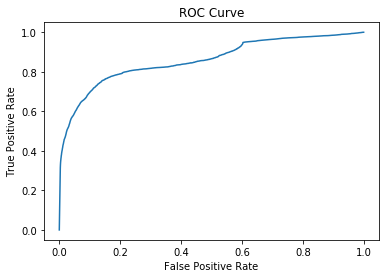

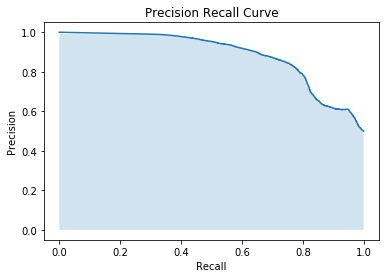

Test Data Results:
('Test Accuracy: ', 0.740771613905233)
              precision    recall  f1-score   support

           0       0.66      0.97      0.79    552565
           1       0.95      0.51      0.66    552314

   micro avg       0.74      0.74      0.74   1104879
   macro avg       0.81      0.74      0.73   1104879
weighted avg       0.81      0.74      0.73   1104879

ROC AUC 0.8595028198379306


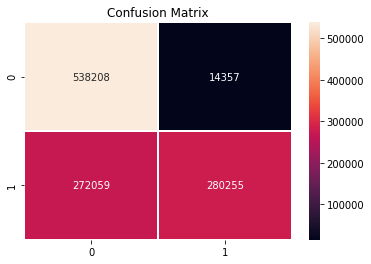

In [97]:
reports(GaussianNB(),X_res_3f,y_res_3f,train_test_split_ratio=0.2)

# 3 Feature with SMOTE END

In [116]:
# import scikitplot as skplt

In [111]:
# !pip install scikitplot

# Scaling of all attributes

In [279]:
from sklearn import preprocessing


In [209]:
# filter_data_array = preprocessing.scale(filter_data)

# Training Accuracy 80-20 split

In [210]:
# from sklearn.model_selection import train_test_split, learning_curve
# from sklearn.utils import shuffle
# train_data,train_labels = shuffle(filter_data_array,y_train)
# trainX, testX, trainY, testY = train_test_split(train_data, train_labels, test_size = 0.2)

In [211]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score

# clf = GaussianNB()
# clf = clf.fit(trainX,trainY)
# y = clf.predict(testX)
# print "Accuracy on Train Data 80-20: " +str(accuracy_score(y,testY))

In [212]:
# trainX[0:5]

In [213]:
# mett = metrics.classification_report(testY,y)
# print mett

# random under sampling

In [214]:
index_nonfraud = copydata_new.index[copydata_new['isFraud'] == 0 ].tolist()

random_index_nonfraud = np.random.choice(index_nonfraud,len(copydata.loc[copydata_new['isFraud']== 1]),replace=False)

index_fraud = copydata_new.index[copydata_new['isFraud'] == 1 ].tolist()

random_index_fraud = np.random.choice(index_fraud,len(copydata.loc[copydata_new['isFraud']== 1]),replace=False)

print len((random_index_fraud)),len((random_index_nonfraud))

8213 8213


In [215]:
print "Ratio of Fraud in sampled data: ",len(random_index_fraud)/float(len(random_index_fraud)+len(random_index_nonfraud))
print "Ratio of Not Fraud in sampled data: ",len(random_index_nonfraud)/float(len(random_index_fraud)+len(random_index_nonfraud))


Ratio of Fraud in sampled data:  0.5
Ratio of Not Fraud in sampled data:  0.5


In [216]:
index_req = np.concatenate((np.array(random_index_fraud),np.array(random_index_nonfraud)))
sampled_data = filter_data.iloc[index_req,:]
sampled_labels = []
for i in range(0,len(index_req)):
    sampled_labels.append( y_train.iloc[index_req[i]] )


sampled_labels=np.array(sampled_labels)
print len(sampled_data),len(sampled_labels)

16426 16426


In [217]:
sampled_data.shape

(16426, 8)

In [218]:
import keras

In [291]:
from keras.layers import Input,Dense
from keras.models import Model,load_model

In [220]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


In [267]:
# this is our input placeholder
input_img = Input(shape=(None,8))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(8, activation='relu')(encoded)

In [268]:
sampled_data, sampled_labels = shuffle(sampled_data, sampled_labels)

In [342]:
trainX, testX, trainY, testY = train_test_split(preprocessing.scale(sampled_data), sampled_labels, test_size = 0.2,shuffle=False)

In [343]:
trainX.shape

(13140, 8)

In [344]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [345]:
autoencoder.compile(optimizer='adam', loss='MSE')

In [346]:
trainX3d = np.array(trainX).reshape(len(trainX),1,8)
testX3d = np.array(testX).reshape(len(testX),1,8)

In [347]:
# print a[0]
# trainX.head(1)


In [348]:
# trainX = np.reshape(trainX,(np.shape(trainX)[0],1,8))
# testX = np.reshape(testX, (np.shape(testX)[0],1,8))

In [349]:
auto=autoencoder.fit(np.array(trainX3d), np.array(trainX3d),
                epochs=5,
                batch_size=3,
                shuffle=False,
                validation_data=(np.array(testX3d), np.array(testX3d)))


Train on 13140 samples, validate on 3286 samples
Epoch 1/5
13140/13140 [==============================] - 4s 337us/step - loss: 0.4069 - val_loss: 0.4287
Epoch 2/5
13140/13140 [==============================] - 4s 267us/step - loss: 0.4069 - val_loss: 0.4288
Epoch 3/5
13140/13140 [==============================] - 3s 251us/step - loss: 0.4068 - val_loss: 0.4287
Epoch 4/5
13140/13140 [==============================] - 4s 279us/step - loss: 0.4067 - val_loss: 0.4287
Epoch 5/5
13140/13140 [==============================] - 4s 273us/step - loss: 0.4068 - val_loss: 0.4286


In [350]:
autoencoder.save("auto")

In [351]:
decoder_layer = autoencoder.layers[-1]

In [352]:
# decoder = Model(encoded_input, decoder_layer(encoded_input))

In [353]:
AE = load_model('auto')

In [354]:
# traindadata = trainX3d

In [355]:
# data = np.ones((1,1,8))
encoder = Model(inputs = AE.input, outputs = AE.layers[1].output)
trainX3dout = encoder.predict(trainX3d)
# print(output)
# data = np.ones((1,1,8))
# encoder = Model(inputs = AE.input, outputs = AE.layers[1].output)
testX3dout = encoder.predict(testX3d)
# print(output)

In [356]:
trainX3dout = trainX3dout.reshape(len(trainX3dout),32)
testX3dout = testX3dout.reshape(len(testX3dout),32)

In [357]:
trainX3dout.shape
testX3dout.shape

(3286, 32)

In [358]:
# trainX3dout.reshape(len(trainX3dout),32)

# Auto encoder 32 features RUS

GaussianNB(priors=None, var_smoothing=1e-09)


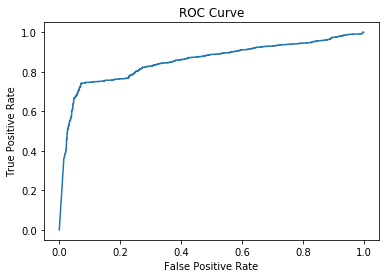

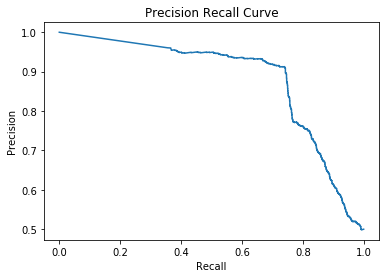

Test Data Results:
('Test Accuracy: ', 0.7720632988435788)
MCC:  0.5441301305734906
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1645
           1       0.77      0.77      0.77      1641

   micro avg       0.77      0.77      0.77      3286
   macro avg       0.77      0.77      0.77      3286
weighted avg       0.77      0.77      0.77      3286

ROC AUC 0.8543178319987998


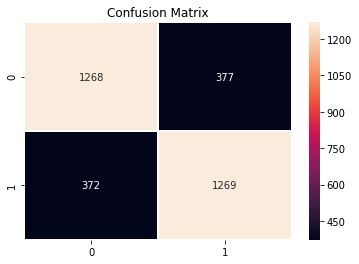

In [359]:
reports_test(GaussianNB(),trainX3dout,trainY,testX3dout,testY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=48, p=2,
           weights='uniform')


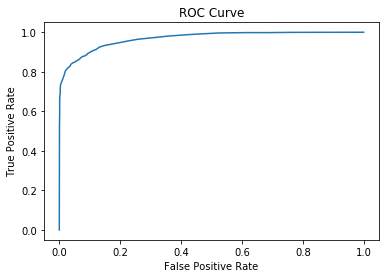

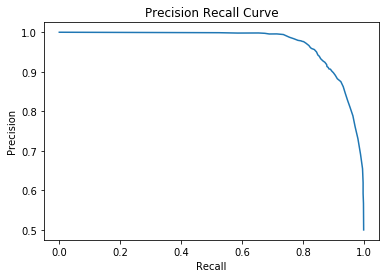

Test Data Results:
('Test Accuracy: ', 0.8992696287279367)
MCC:  0.8002860575213168
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1645
           1       0.93      0.87      0.90      1641

   micro avg       0.90      0.90      0.90      3286
   macro avg       0.90      0.90      0.90      3286
weighted avg       0.90      0.90      0.90      3286

ROC AUC 0.9685261229623126


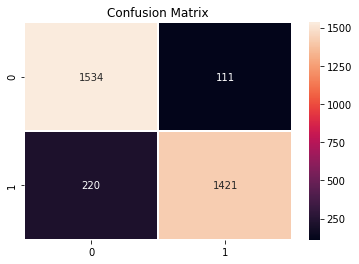

In [360]:
reports_test(knn,trainX3dout,trainY,testX3dout,testY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


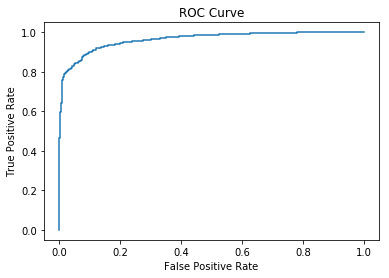

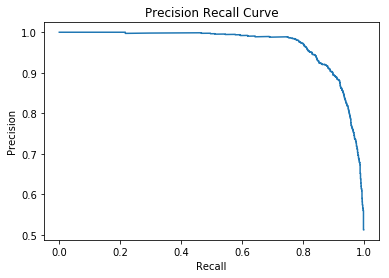

Test Data Results:
('Test Accuracy: ', 0.8925745587340231)
MCC:  0.7907081827447131
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1645
           1       0.95      0.83      0.89      1641

   micro avg       0.89      0.89      0.89      3286
   macro avg       0.90      0.89      0.89      3286
weighted avg       0.90      0.89      0.89      3286

ROC AUC 0.9632854160762675


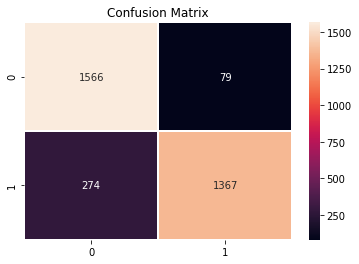

In [361]:
reports_test(LogisticRegression(),trainX3dout,trainY,testX3dout,testY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


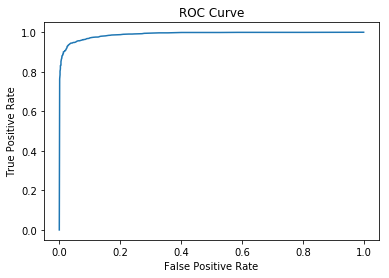

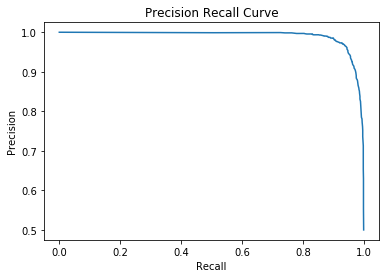

Test Data Results:
('Test Accuracy: ', 0.9494826536822885)
MCC:  0.9000808538523193
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1645
           1       0.97      0.92      0.95      1641

   micro avg       0.95      0.95      0.95      3286
   macro avg       0.95      0.95      0.95      3286
weighted avg       0.95      0.95      0.95      3286

ROC AUC 0.9897038094867648


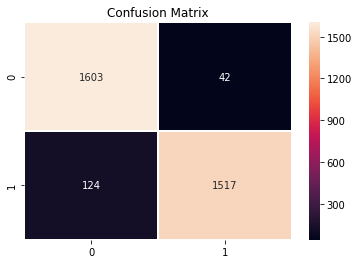

In [362]:
reports_test(randomforest,trainX3dout,trainY,testX3dout,testY)

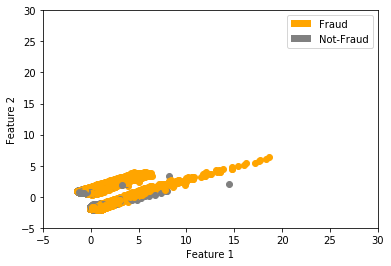

In [379]:
scatterplot(trainX3dout,trainY)

# 5 features RUC

In [366]:
trainX5d, testX5d, trainY5d, testY5d = train_test_split(preprocessing.scale(sampled_data.drop(['step','newbalanceOrig','newbalanceDest'],axis=1)), sampled_labels, test_size = 0.2,shuffle=False)

GaussianNB(priors=None, var_smoothing=1e-09)


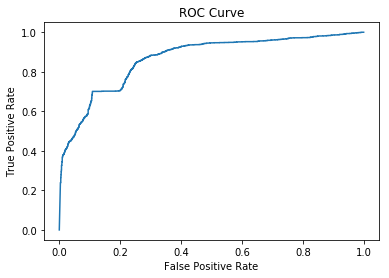

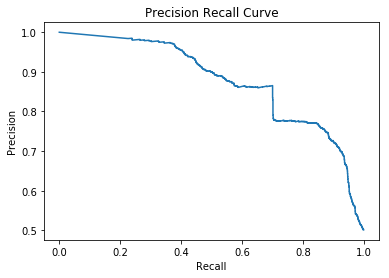

Test Data Results:
('Test Accuracy: ', 0.7060255629945222)
MCC:  0.4836908632956777
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1645
           1       0.93      0.44      0.60      1641

   micro avg       0.71      0.71      0.71      3286
   macro avg       0.78      0.71      0.68      3286
weighted avg       0.78      0.71      0.68      3286

ROC AUC 0.8669996980860881


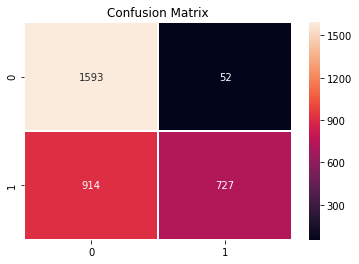

In [367]:
reports_test(GaussianNB(),trainX5d,trainY5d,testX5d,testY5d)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=48, p=2,
           weights='uniform')


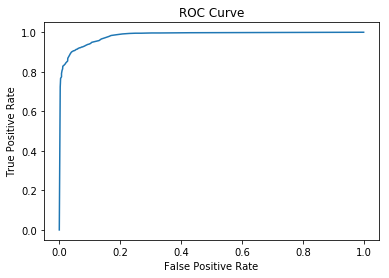

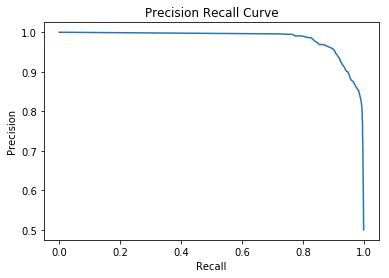

Test Data Results:
('Test Accuracy: ', 0.9260499087035909)
MCC:  0.8521006899842914
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1645
           1       0.93      0.93      0.93      1641

   micro avg       0.93      0.93      0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286

ROC AUC 0.9828907423562991


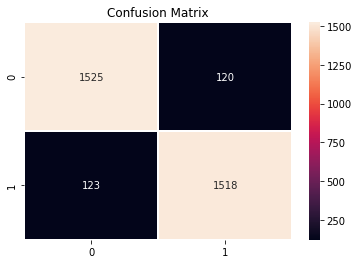

In [368]:
reports_test(knn,trainX5d,trainY5d,testX5d,testY5d)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


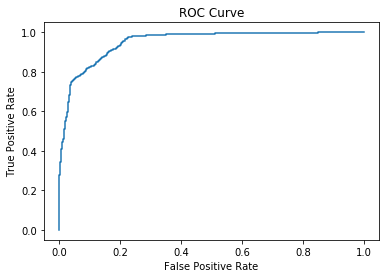

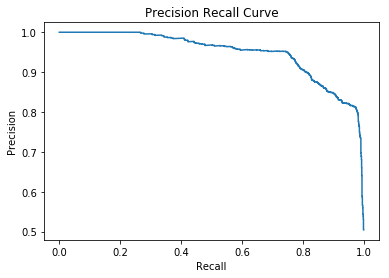

Test Data Results:
('Test Accuracy: ', 0.8575776019476568)
MCC:  0.7204720187565417
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1645
           1       0.91      0.80      0.85      1641

   micro avg       0.86      0.86      0.86      3286
   macro avg       0.86      0.86      0.86      3286
weighted avg       0.86      0.86      0.86      3286

ROC AUC 0.9503638710920207


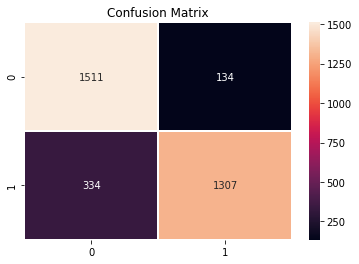

In [369]:
reports_test(LogisticRegression(),trainX5d,trainY5d,testX5d,testY5d)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


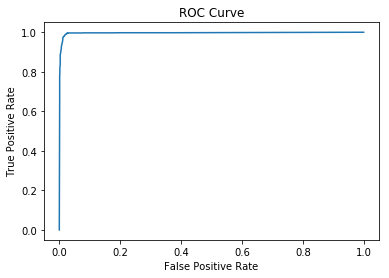

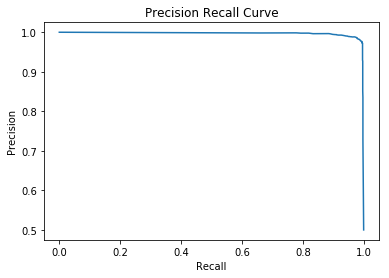

Test Data Results:
('Test Accuracy: ', 0.9820450395617772)
MCC:  0.9644859575004673
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1645
           1       0.97      1.00      0.98      1641

   micro avg       0.98      0.98      0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

ROC AUC 0.9962568231617981


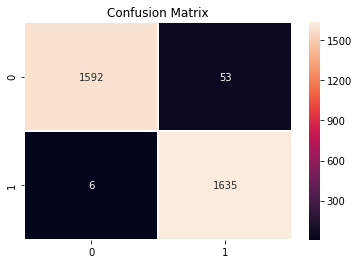

In [370]:
reports_test(randomforest,trainX5d,trainY5d,testX5d,testY5d)

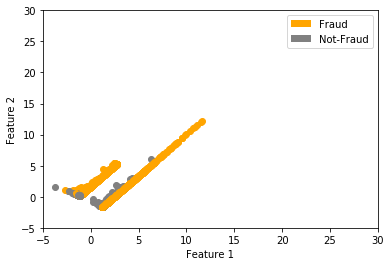

In [381]:
scatterplot(trainX5d,trainY5d)

# 8 features RUC

In [365]:
trainX8d, testX8d, trainY8d, testY8d = train_test_split(preprocessing.scale(sampled_data), sampled_labels, test_size = 0.2,shuffle=False)

GaussianNB(priors=None, var_smoothing=1e-09)


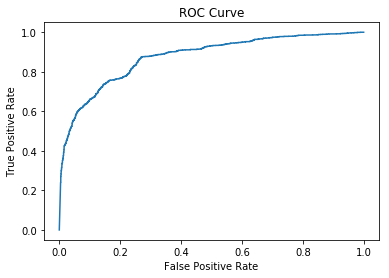

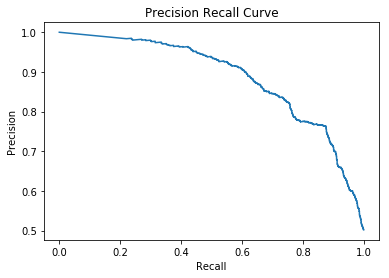

Test Data Results:
('Test Accuracy: ', 0.7035909920876445)
MCC:  0.4916072486495511
              precision    recall  f1-score   support

           0       0.63      0.98      0.77      1645
           1       0.96      0.42      0.59      1641

   micro avg       0.70      0.70      0.70      3286
   macro avg       0.80      0.70      0.68      3286
weighted avg       0.80      0.70      0.68      3286

ROC AUC 0.8756333246278402


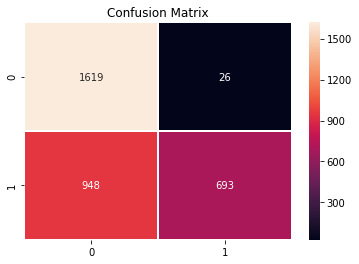

In [372]:
reports_test(GaussianNB(),trainX8d,trainY8d,testX8d,testY8d)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=48, p=2,
           weights='uniform')


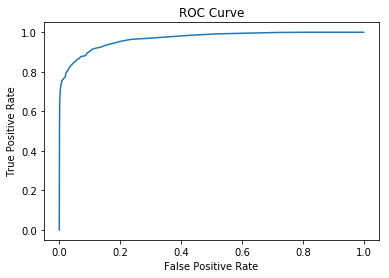

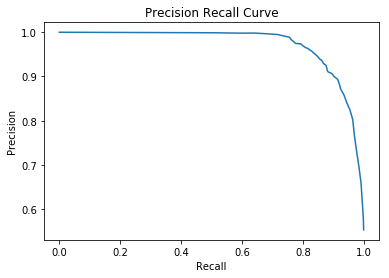

Test Data Results:
('Test Accuracy: ', 0.9017041996348144)
MCC:  0.8055067296728425
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1645
           1       0.93      0.87      0.90      1641

   micro avg       0.90      0.90      0.90      3286
   macro avg       0.90      0.90      0.90      3286
weighted avg       0.90      0.90      0.90      3286

ROC AUC 0.9676866911531814


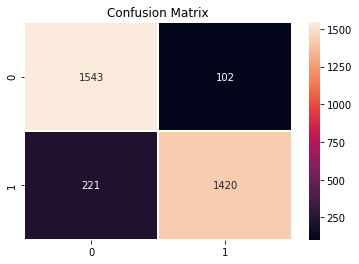

In [374]:
reports_test(knn,trainX8d,trainY8d,testX8d,testY8d)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


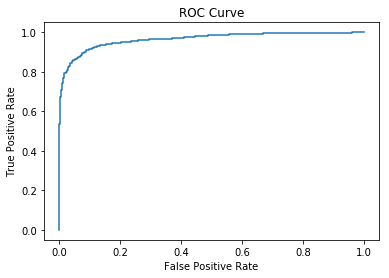

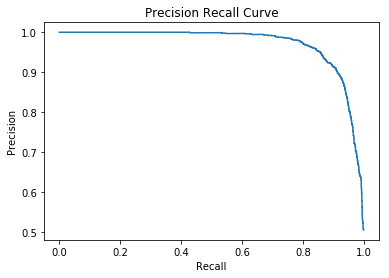

Test Data Results:
('Test Accuracy: ', 0.9035301278149727)
MCC:  0.8119776313389245
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1645
           1       0.95      0.85      0.90      1641

   micro avg       0.90      0.90      0.90      3286
   macro avg       0.91      0.90      0.90      3286
weighted avg       0.91      0.90      0.90      3286

ROC AUC 0.9644278731368856


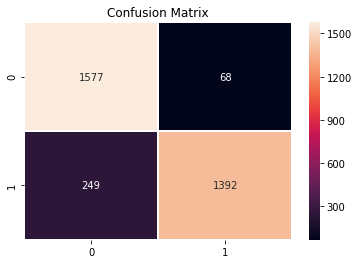

In [375]:
reports_test(LogisticRegression(),trainX8d,trainY8d,testX8d,testY8d)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


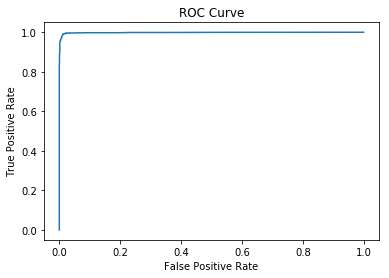

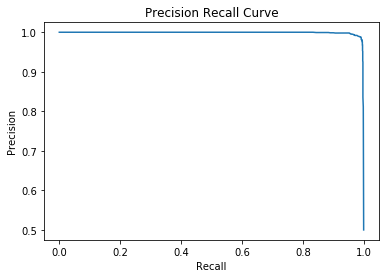

Test Data Results:
('Test Accuracy: ', 0.9866098600121729)
MCC:  0.9732784464756336
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1645
           1       0.98      0.99      0.99      1641

   micro avg       0.99      0.99      0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

ROC AUC 0.9984206012717428


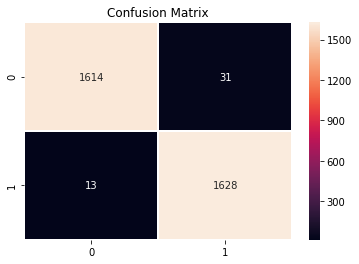

In [376]:
reports_test(randomforest,trainX8d,trainY8d,testX8d,testY8d)

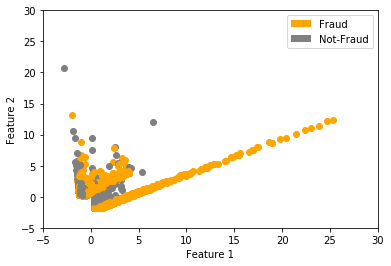

In [380]:
scatterplot(trainX8d,trainY8d)